<a href="https://colab.research.google.com/github/Shilpi786/Employee-salary-Predictor/blob/main/employeee_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
#load data set
import pandas as pd
df = pd.read_csv('/content/adult.csv')
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [ ]:
#view first 10 rows and last 5 row
print(df.head(10))
print(df.tail(3))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [ ]:
#check dataset
df.shape

(48842, 15)

In [ ]:
#null values
df.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
#display frequency count
print(df.workclass.value_counts())
print("\n")
print(df.occupation.value_counts())
print("\n")
print(df['native-country'].value_counts())
print("\n")
print(df.relationship.value_counts())
print("\n")
print(df.gender.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     

In [ ]:
df.shape

(48842, 15)

In [ ]:
#replace missing value

df.workclass.replace({'?': 'Others'}, inplace=True)
print("\n")
df.occupation.replace({'?': 'Others'}, inplace=True)
print("\n")
print(df.workclass.value_counts())
print("\n")
print(df.occupation.value_counts())





workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-7-2424418312.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-7-2424418312.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
#remove irrevalent data
df = df[(df['workclass'] != 'Without-pay') & (df['workclass'] != 'Never-worked')]
print(df.workclass.value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
df.shape

(48811, 15)

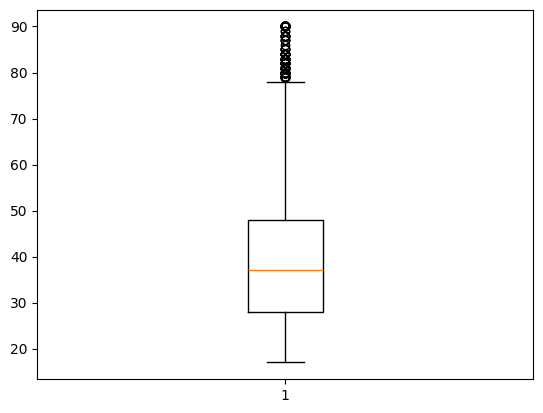

In [ ]:
#outlier detection in age
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

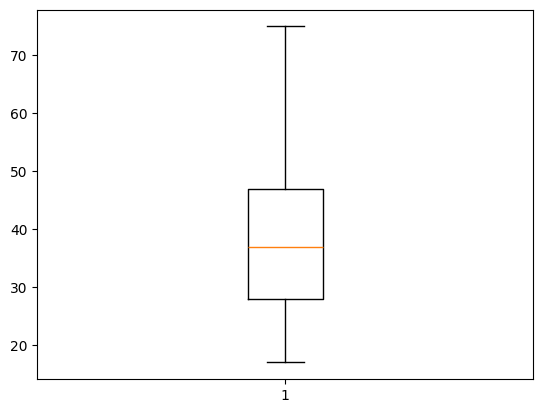

In [ ]:
#remove age outlires (<17 and >75)
df=df[(df['age']<=75)&(df['age']>=17)]
plt.boxplot(df['age'])
plt.show()

In [ ]:
df.shape

(48438, 15)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18        Others  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

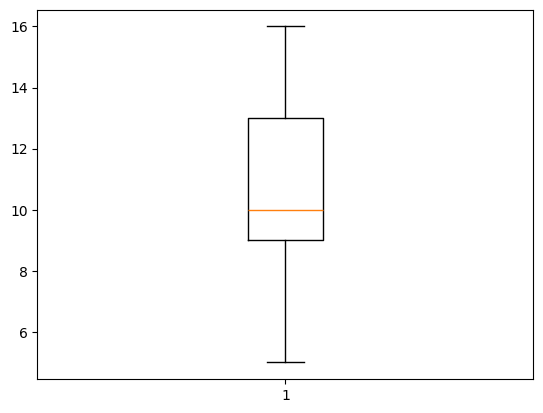

In [ ]:
#education number outliers
df = df[(df['educational-num'] >= 5) & (df['educational-num'] <= 16)]
print(df)
plt.boxplot(df['educational-num'])
plt.show()


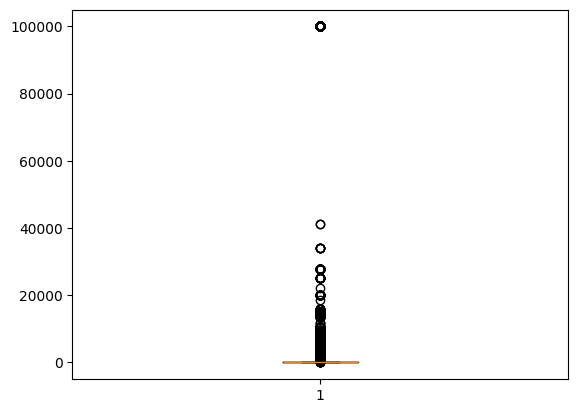

In [ ]:
plt.boxplot(df['capital-gain'])
plt.show()

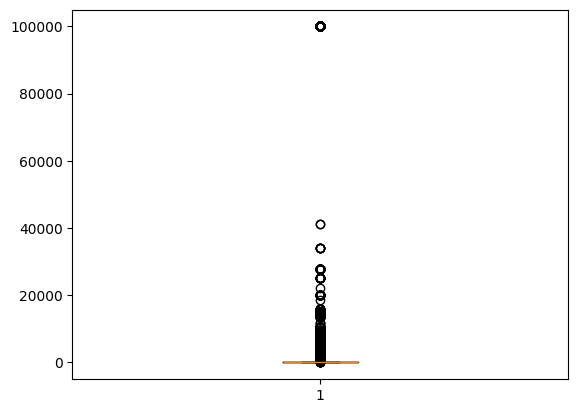

In [ ]:
plt.boxplot(df['capital-gain'])
plt.show()

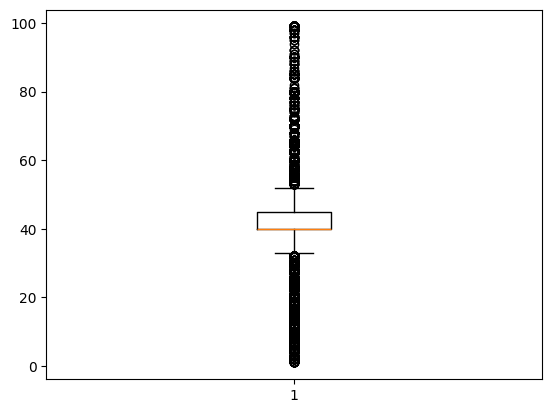

In [ ]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [ ]:
df=df.drop(columns=['education']) #redundant features removal
print(df)

       age     workclass  fnlwgt  educational-num      marital-status  \
0       25       Private  226802                7       Never-married   
1       38       Private   89814                9  Married-civ-spouse   
2       28     Local-gov  336951               12  Married-civ-spouse   
3       44       Private  160323               10  Married-civ-spouse   
4       18        Others  103497               10       Never-married   
...    ...           ...     ...              ...                 ...   
48837   27       Private  257302               12  Married-civ-spouse   
48838   40       Private  154374                9  Married-civ-spouse   
48839   58       Private  151910                9             Widowed   
48840   22       Private  201490                9       Never-married   
48841   52  Self-emp-inc  287927                9  Married-civ-spouse   

              occupation relationship   race  gender  capital-gain  \
0      Machine-op-inspct    Own-child  Black    Male 

In [ ]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#label encoding
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Prepare features and target
X = df.drop(columns=["income"])
y = df["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7964
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7010
           1       0.66      0.37      0.48      2334

    accuracy                           0.80      9344
   macro avg       0.74      0.66      0.68      9344
weighted avg       0.78      0.80      0.77      9344

RandomForest: 0.8489
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7010
           1       0.74      0.62      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.84      9344

KNN: 0.7704
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      7010
           1       0.57      0.33      0.42      2334

    accuracy                           0.77      9344
   macro avg       0.69      0.62      0.64      9344
weighted avg  

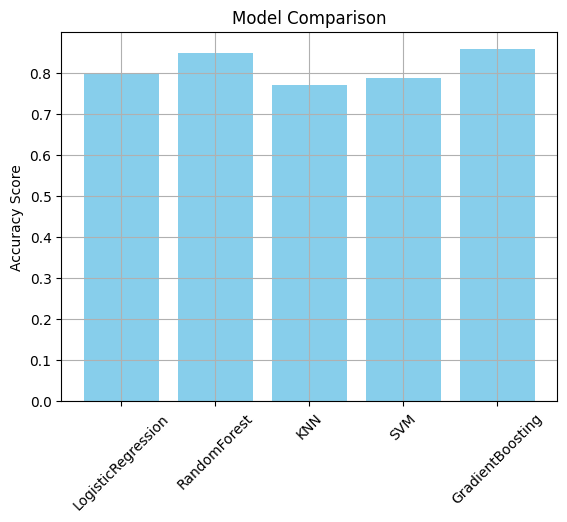

In [ ]:
#comparing ML ALGORITHMS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")
    print(classification_report(y_test, preds))

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")
#visualization of model performance
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier()
model.fit(X_train, y_train)


joblib.dump(model, "salary_model.pkl")

['salary_model.pkl']

In [ ]:
!pip install gradio --quiet

!pip install gradio --quiet

import gradio as gr
import os
model = joblib.load("salary_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")
feature_columns = joblib.load("feature_columns.pkl")

history = []

def predict_salary(age, workclass, marital_status, occupation, relationship, race, gender,
                   hours_per_week, native_country, capital_gain, capital_loss, educational_num, fnlwgt):
    try:
        data = pd.DataFrame([[age, workclass, marital_status, occupation, relationship, race, gender,
                              hours_per_week, native_country, capital_gain, capital_loss, educational_num, fnlwgt]],
                            columns=['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender',
                                     'hours-per-week', 'native-country', 'capital-gain', 'capital-loss', 'educational-num', 'fnlwgt'])

        for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
            data[col] = label_encoders[col].transform(data[col])

        data = data[feature_columns]
        pred = model.predict(data)[0]
        result = ">50K" if pred == 1 else "<=50K"

        history.append({
            "Age": age,
            "Hours": hours_per_week,
            "Capital Gain": capital_gain,
            "Capital Loss": capital_loss,
            "Education Num": educational_num,
            "fnlwgt": fnlwgt,
            "Income": result
        })

        return f"Predicted Income: {result}"
    except Exception as e:
        return f"Error: {str(e)}"

def show_history():
    if not history:
        return pd.DataFrame()
    return pd.DataFrame(history)

def draw_chart():
    if not history:
        return None
    latest = pd.DataFrame([list(history[-1].values())[:-1]], columns=list(history[-1].keys())[:-1])
    avg = pd.DataFrame([{
        "Age": df["age"].mean(),
        "Hours": df["hours-per-week"].mean(),
        "Capital Gain": df["capital-gain"].mean(),
        "Capital Loss": df["capital-loss"].mean(),
        "Education Num": df["educational-num"].mean(),
        "fnlwgt": df["fnlwgt"].mean()
    }])

    plt.figure(figsize=(8, 4))
    plt.bar(latest.columns, latest.iloc[0], label="Latest", alpha=0.7, color='skyblue')
    plt.bar(avg.columns, avg.iloc[0], label="Average", alpha=0.7, color='orange')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title("Latest Input vs Average Profile")
    plt.tight_layout()

    chart_path = "/tmp/chart.png"
    plt.savefig(chart_path)
    plt.close()
    return chart_path

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("""
        <div style="text-align:center">
        <h1 style="color:#4CAF50; font-size: 32px;">💼 Employee Salary Predictor</h1>
        <p style="font-size: 16px;">🔍 Estimate if a person earns more than 50K using demographic and job details</p>
        </div>
    """)

    with gr.Tab("FORM"):
        with gr.Row():
            with gr.Column():
                age = gr.Slider(18, 70, value=30, step=1, label="Age")
                fnlwgt = gr.Number(value=100000, label="fnlwgt")
                educational_num = gr.Slider(5, 16, value=10, step=1, label="Education Number")
                hours_per_week = gr.Slider(1, 80, value=40, step=1, label="Hours per Week")
                capital_gain = gr.Number(value=0, label="Capital Gain")
                capital_loss = gr.Number(value=0, label="Capital Loss")
                workclass = gr.Dropdown(label_encoders['workclass'].classes_.tolist(), label="Workclass")
            with gr.Column():
                marital_status = gr.Dropdown(label_encoders['marital-status'].classes_.tolist(), label="Marital Status")
                occupation = gr.Dropdown(label_encoders['occupation'].classes_.tolist(), label="Occupation")
                relationship = gr.Dropdown(label_encoders['relationship'].classes_.tolist(), label="Relationship")
                race = gr.Dropdown(label_encoders['race'].classes_.tolist(), label="Race")
                gender = gr.Dropdown(label_encoders['gender'].classes_.tolist(), label="Gender")
                native_country = gr.Dropdown(label_encoders['native-country'].classes_.tolist(), label="Native Country")
                experience= gr.Slider(0, 100, value=50, step=1, label="experience")

        predict_btn = gr.Button("🎯 Predict Income")
        output = gr.Textbox(label="Prediction")

        predict_btn.click(
            fn=predict_salary,
            inputs=[age, workclass, marital_status, occupation, relationship, race, gender,
                    hours_per_week, native_country, capital_gain, capital_loss, educational_num, fnlwgt],
            outputs=output
        )

    with gr.Tab("📜 History"):
        show_btn = gr.Button("📋 Show History")
        history_table = gr.Dataframe()
        show_btn.click(fn=show_history, inputs=[], outputs=history_table)

    with gr.Tab("📈 Comparison Chart"):
        chart_btn = gr.Button("📊 Show Comparison")
        chart_output = gr.Image()
        chart_btn.click(fn=draw_chart, inputs=[], outputs=chart_output)


In [ ]:
os.environ["GRADIO_SERVER_NAME"] = "0.0.0.0"
os.environ["GRADIO_SERVER_PORT"] = "7860"
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0e9286adddc35b4ff9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
